🔍 FEATURE IMPORTANCE ANALYSIS FOR ENSEMBLE MODELS
(Analysis without training data - model intrinsic feature importance only)

ANALYZING XGBOOST MODEL
✅ Model loaded successfully: XGBClassifier
📋 Feature names found: None
📋 Using fallback feature names: ['AnomalyScore', 'RegionArea', 'MaxVal', 'RegionCount', 'CLBurn Through', 'CLGood', 'CLNotching', 'CLPorosity', 'CL_ConfMax', 'CL_ConfMargin', 'Row1', 'Col1', 'Length1', 'Length2', 'PHI', 'OD1_ClassID', 'OD1_Conf', 'SSbackground', 'x1', 'y1', 'conf1', 'SSGood', 'x2', 'y2', 'conf2', 'SSNotching', 'x3', 'y3', 'conf3', 'SSPorosity', 'x4', 'y4', 'conf4']
🔢 Number of features in model: 33
🏷️ Number of feature names available: 33


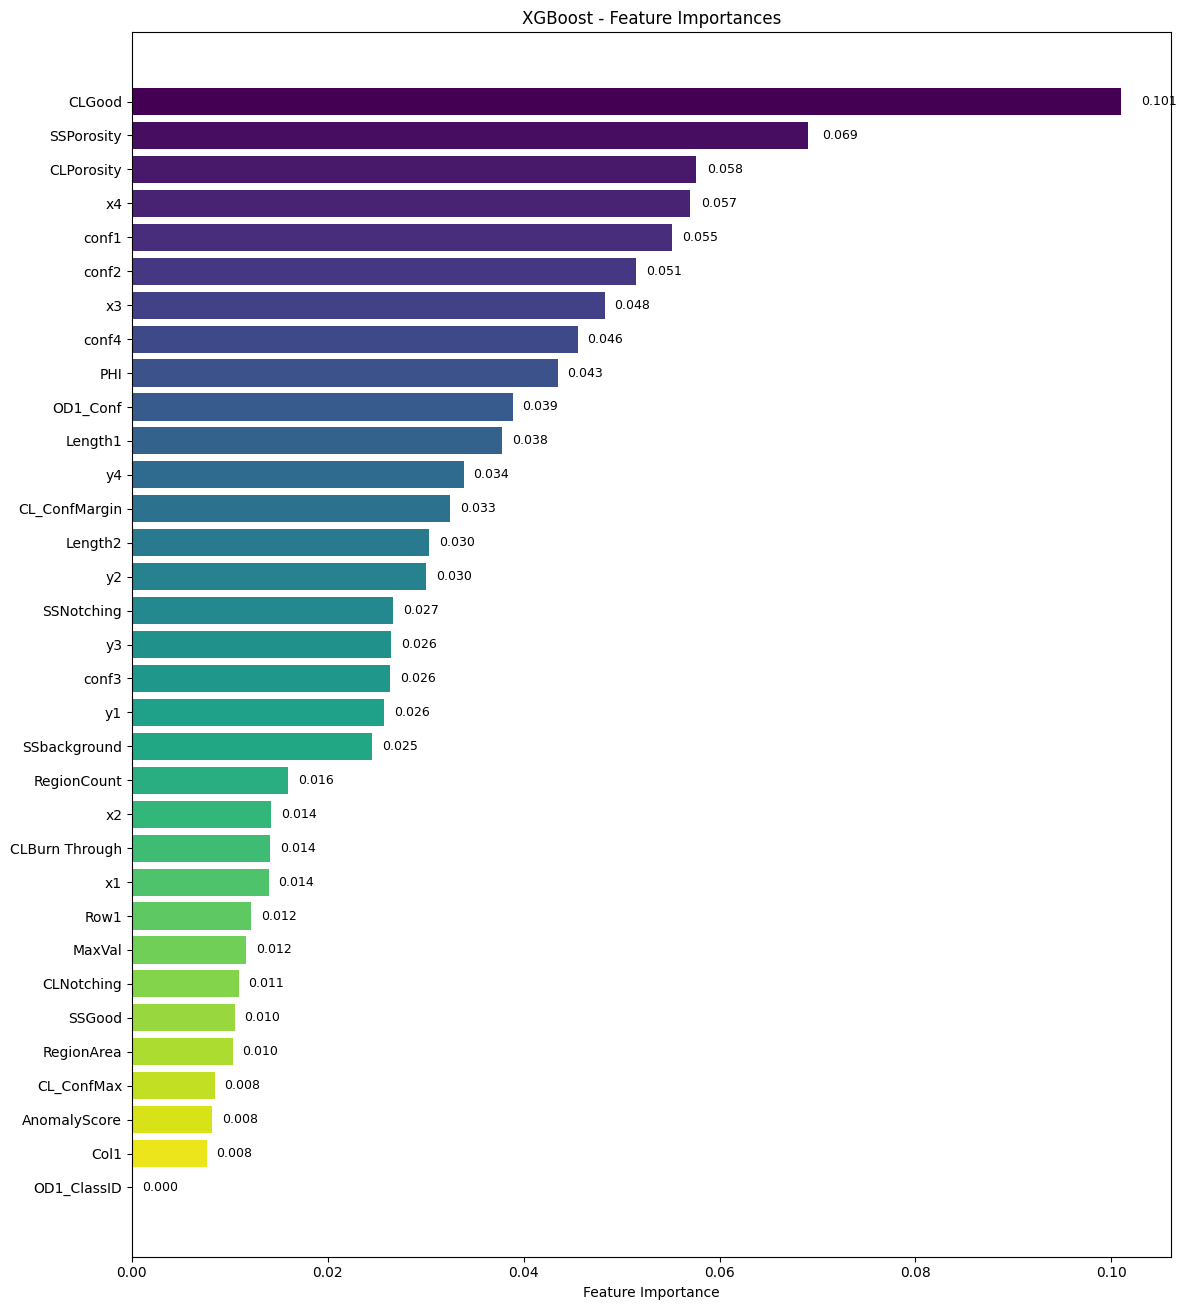


📊 XGBoost Feature Importance Rankings:
 1. CLGood               : 0.1010
 2. SSPorosity           : 0.0691
 3. CLPorosity           : 0.0576
 4. x4                   : 0.0570
 5. conf1                : 0.0551
 6. conf2                : 0.0515
 7. x3                   : 0.0483
 8. conf4                : 0.0455
 9. PHI                  : 0.0435
10. OD1_Conf             : 0.0389
11. Length1              : 0.0378
12. y4                   : 0.0339
13. CL_ConfMargin        : 0.0325
14. Length2              : 0.0303
15. y2                   : 0.0301
16. SSNotching           : 0.0267
17. y3                   : 0.0265
18. conf3                : 0.0264
19. y1                   : 0.0257
20. SSbackground         : 0.0245
21. RegionCount          : 0.0160
22. x2                   : 0.0142
23. CLBurn Through       : 0.0141
24. x1                   : 0.0140
25. Row1                 : 0.0122
26. MaxVal               : 0.0117
27. CLNotching           : 0.0109
28. SSGood               : 0.0105
29. Regi

In [10]:
# === Setup ===
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def analyze_model_features(model_path, model_type="XGBoost"):
    """Analyze feature importance for a given model"""
    print(f"\n{'='*60}")
    print(f"ANALYZING {model_type.upper()} MODEL")
    print(f"{'='*60}")
    
    # === Load Model ===
    try:
        with open(model_path, "rb") as f:
            model = pickle.load(f)
        print(f"✅ Model loaded successfully: {type(model).__name__}")
    except FileNotFoundError:
        print(f"❌ Model file not found at: {model_path}")
        return None
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None

    # === Load feature info to get correct feature names ===
    feature_info_path = r"C:\Users\QuinnMazaris\Documents\feature_info.pkl"
    actual_feature_names = None
    
    try:
        with open(feature_info_path, "rb") as f:
            feature_info = pickle.load(f)
        if 'feature_names' in feature_info:
            actual_feature_names = feature_info['feature_names']
            print(f"✅ Loaded actual feature names from feature_info.pkl: {len(actual_feature_names)} features")
        elif 'columns' in feature_info:
            actual_feature_names = feature_info['columns']
            print(f"✅ Loaded feature names from columns: {len(actual_feature_names)} features")
        print(f"📋 Feature names found: {actual_feature_names}")
    except Exception as e:
        print(f"⚠️ Could not load feature_info.pkl: {e}")
        print("Using default feature names...")

    # Fallback feature names (17 features based on your model)
    if actual_feature_names is None:
        actual_feature_names = [
            "AnomalyScore", "RegionArea", "MaxVal", "RegionCount", "CLBurn Through", "CLGood", "CLNotching", "CLPorosity", "CL_ConfMax", "CL_ConfMargin", "Row1", "Col1", "Length1", "Length2", "PHI", "OD1_ClassID", "OD1_Conf", "SSbackground", "x1", "y1", "conf1", "SSGood", "x2", "y2", "conf2", "SSNotching", "x3", "y3", "conf3", "SSPorosity", "x4", "y4", "conf4"
        ]
        print(f"📋 Using fallback feature names: {actual_feature_names}")

    # === Feature Importances ===
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        print(f"🔢 Number of features in model: {len(importances)}")
        print(f"🏷️ Number of feature names available: {len(actual_feature_names)}")
        
        # Use actual feature names, truncate if needed
        feature_names_to_use = actual_feature_names[:len(importances)]
        if len(feature_names_to_use) < len(importances):
            # Add generic names for missing features
            for i in range(len(feature_names_to_use), len(importances)):
                feature_names_to_use.append(f"Feature_{i}")
        
        importance_df = pd.DataFrame({
            "Feature": feature_names_to_use,
            "Importance": importances
        }).sort_values("Importance", ascending=False)

        # Plot all features
        plt.figure(figsize=(12, max(8, len(importance_df) * 0.4)))
        colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
        bars = plt.barh(range(len(importance_df)), importance_df["Importance"], color=colors)
        plt.yticks(range(len(importance_df)), importance_df["Feature"])
        plt.xlabel("Feature Importance")
        plt.title(f"{model_type} - Feature Importances")
        plt.gca().invert_yaxis()  # Highest importance at top
        
        # Add value labels on bars
        for i, (bar, importance) in enumerate(zip(bars, importance_df["Importance"])):
            plt.text(bar.get_width() + max(0.001, importance * 0.02), bar.get_y() + bar.get_height()/2, 
                    f'{importance:.3f}', ha='left', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n📊 {model_type} Feature Importance Rankings:")
        print("="*50)
        for idx, row in importance_df.iterrows():
            rank = importance_df.index.get_loc(idx) + 1
            print(f"{rank:2d}. {row['Feature']:<20} : {row['Importance']:.4f}")
        
        # Save to CSV for reference
        output_path = f"{model_type.lower()}_feature_importances.csv"
        importance_df.to_csv(output_path, index=False)
        print(f"\n✅ Feature importances saved to: {output_path}")
        
        return model, importance_df, feature_names_to_use
        
    else:
        print("❌ Model does not expose 'feature_importances_'.")
        available_attrs = [attr for attr in dir(model) if not attr.startswith('_') and not callable(getattr(model, attr))]
        print(f"Available model attributes: {available_attrs}")
        return None

def create_feature_importance_table(results):
    """Create a nice comparison table of feature importances"""
    if len(results) < 2:
        return
    
    # Get all unique features
    all_features = set()
    for data in results.values():
        all_features.update(data['importance_df']['Feature'].tolist())
    
    # Create comparison DataFrame
    comparison_data = {'Feature': sorted(list(all_features))}
    
    for model_type, data in results.items():
        importance_dict = dict(zip(data['importance_df']['Feature'], data['importance_df']['Importance']))
        comparison_data[f'{model_type}_Importance'] = [importance_dict.get(feat, 0.0) for feat in comparison_data['Feature']]
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Add difference column if we have exactly 2 models
    model_types = list(results.keys())
    if len(model_types) == 2:
        col1, col2 = f'{model_types[0]}_Importance', f'{model_types[1]}_Importance'
        comparison_df['Difference'] = comparison_df[col1] - comparison_df[col2]
        comparison_df = comparison_df.sort_values('Difference', key=abs, ascending=False)
    
    print(f"\n📋 FEATURE IMPORTANCE COMPARISON TABLE")
    print("="*60)
    display(comparison_df)
    
    # Save comparison
    comparison_df.to_csv("model_feature_comparison.csv", index=False)
    print("✅ Comparison table saved to: model_feature_comparison.csv")

# === Main Analysis ===
print("🔍 FEATURE IMPORTANCE ANALYSIS FOR ENSEMBLE MODELS")
print("(Analysis without training data - model intrinsic feature importance only)")
print("="*80)

# Model paths
models_to_analyze = [
    (r"C:\Users\QuinnMazaris\Documents\XGBoost_production.pkl", "XGBoost")
    ]

results = {}

for model_path, model_type in models_to_analyze:
    if os.path.exists(model_path):
        result = analyze_model_features(model_path, model_type)
        if result:
            model, importance_df, feature_names = result
            results[model_type] = {
                'model': model,
                'importance_df': importance_df,
                'feature_names': feature_names
            }
        else:
            print(f"❌ Failed to analyze {model_type} model")
    else:
        print(f"❌ {model_type} model not found at: {model_path}")

# === Compare Models ===
if len(results) > 1:
    print(f"\n{'='*80}")
    print("📊 MODEL COMPARISON")
    print(f"{'='*80}")
    
    # Create comparison plot
    fig, axes = plt.subplots(1, len(results), figsize=(16, 10))
    if len(results) == 1:
        axes = [axes]
    
    for idx, (model_type, data) in enumerate(results.items()):
        importance_df = data['importance_df']
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(importance_df)))
        bars = axes[idx].barh(range(len(importance_df)), importance_df["Importance"], color=colors)
        axes[idx].set_yticks(range(len(importance_df)))
        axes[idx].set_yticklabels(importance_df["Feature"])
        axes[idx].set_xlabel("Feature Importance")
        axes[idx].set_title(f"{model_type}", fontsize=14, fontweight='bold')
        axes[idx].invert_yaxis()
        
        # Add value labels
        for i, (bar, importance) in enumerate(zip(bars, importance_df["Importance"])):
            axes[idx].text(bar.get_width() + max(0.001, importance * 0.02), 
                          bar.get_y() + bar.get_height()/2, 
                          f'{importance:.3f}', ha='left', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Create detailed comparison table
    create_feature_importance_table(results)
    
    # Show top features comparison
    print(f"\n🏆 TOP 5 FEATURES COMPARISON")
    print("="*50)
    max_model_name_len = max(len(name) for name in results.keys())
    
    for rank in range(1, 6):
        print(f"\nRank {rank}:")
        for model_type, data in results.items():
            if rank <= len(data['importance_df']):
                feature_info = data['importance_df'].iloc[rank-1]
                print(f"  {model_type:<{max_model_name_len}}: {feature_info['Feature']:<20} ({feature_info['Importance']:.4f})")
            else:
                print(f"  {model_type:<{max_model_name_len}}: {'N/A':<20}")

elif len(results) == 1:
    model_type, data = list(results.items())[0]
    print(f"\n🎯 SINGLE MODEL ANALYSIS: {model_type}")
    print("="*50)
    print("Top 10 Most Important Features:")
    top_features = data['importance_df'].head(10)
    for idx, row in top_features.iterrows():
        rank = data['importance_df'].index.get_loc(idx) + 1
        print(f"{rank:2d}. {row['Feature']:<25} : {row['Importance']:.4f}")

print(f"\n{'='*80}")
print("✅ ANALYSIS COMPLETE! 🎉")
print("📁 Files saved:")
for model_type in results.keys():
    print(f"   - {model_type.lower()}_feature_importances.csv")
if len(results) > 1:
    print("   - model_feature_comparison.csv")
print(f"{'='*80}")


In [4]:
pip install shap

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 19.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   --------- ------------------------------ 7.1/30.3 MB 34.6 MB/s eta 0:00:01
   ----------------- ---------------------- 13.4/30.3 MB 31.6 MB/s eta 0:00:01
   --------------------------- ------------ 20.7/30.3 MB 32.8 MB/s eta 0:00:01
   ------------------------------------ --- 27.5/30.3 MB 32.8 MB/s eta 0:00:01
   ---------------------------------------  30.1/30.3 MB 33.0 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 27.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
